# Customer Churn Analysis


Problem Statement Description -

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

I will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

Importing required libraries

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report, f1_score, fbeta_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")

In [5]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
df.shape

(7043, 21)

In the given dataset we have 7043 rows and 21 columns including target columns.

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Statistical description

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#EDA -

Checking the null values in the dataset

In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<AxesSubplot:>

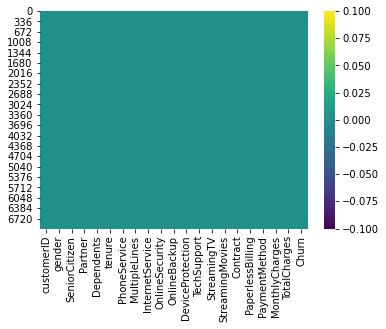

In [13]:
sns.heatmap(df.isnull(), cmap = "viridis")

In [14]:
X = df.drop(['Churn'], axis = 1)
Y = df['Churn']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, stratify = Y, test_size = 0.25, random_state= 42)
x_train.shape

(5282, 20)

In [16]:
df= pd.concat([x_train,  y_train], axis = 1)
df.shape


(5282, 21)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5282 entries, 6661 to 5639
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5282 non-null   object 
 1   gender            5282 non-null   object 
 2   SeniorCitizen     5282 non-null   int64  
 3   Partner           5282 non-null   object 
 4   Dependents        5282 non-null   object 
 5   tenure            5282 non-null   int64  
 6   PhoneService      5282 non-null   object 
 7   MultipleLines     5282 non-null   object 
 8   InternetService   5282 non-null   object 
 9   OnlineSecurity    5282 non-null   object 
 10  OnlineBackup      5282 non-null   object 
 11  DeviceProtection  5282 non-null   object 
 12  TechSupport       5282 non-null   object 
 13  StreamingTV       5282 non-null   object 
 14  StreamingMovies   5282 non-null   object 
 15  Contract          5282 non-null   object 
 16  PaperlessBilling  5282 non-null   objec

In [18]:
df.Churn.value_counts()

No     3880
Yes    1402
Name: Churn, dtype: int64

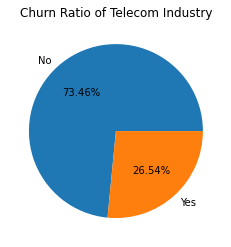

In [22]:
plt.figure(figsize=(6, 4))
plt.pie(df.Churn.value_counts()/df.shape[0], labels = df.Churn.unique(), autopct='%1.2f%%')
plt.title("Churn Ratio of Telecom Industry")
plt.show()

The 26.54% of customers are churning, 73.46% of customers retain with our business.



If I am not converting the Object type of TotalCharges to Float type, then I may not be able to do the EDA part.



# EDA

In [23]:
TotalCharges_missing = df[ pd.to_numeric(df['TotalCharges'], errors='coerce').isnull()]
TotalCharges_missing

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No


In [24]:
df['total_services_opted'] = (df[[ 
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']] == "Yes").sum(axis = 1)

In [25]:
df.loc[:,['Contract','tenure', 'MonthlyCharges', 'TotalCharges','total_services_opted']].sort_values(by=['tenure']).head(30)

,Contract,tenure,MonthlyCharges,TotalCharges,total_services_opted
488,Two year,0,52.55,,4
3826,Two year,0,25.35,,2
6754,Two year,0,61.90,,5
1082,Two year,0,25.75,,2
3331,Two year,0,19.85,,1
6670,Two year,0,73.35,,6
4380,Two year,0,20.00,,1
1340,Two year,0,56.05,,5
3310,Month-to-month,1,78.45,78.45,2
3917,Month-to-month,1,69.10,69.1,1


In [28]:
print("Count of Missing Values in TotalCharges is",TotalCharges_missing.shape[0])
print("'",df.loc[488]['TotalCharges'],"'")

Count of Missing Values in TotalCharges is 8
'   '


In [29]:
TotalCharges_missing.index


Int64Index([6670, 3826, 4380, 488, 1082, 1340, 6754, 3331], dtype='int64')

In [31]:
for idx in TotalCharges_missing.index:
    df.loc[idx,'TotalCharges'] = df.loc[idx]['tenure'] * df.loc[idx]['MonthlyCharges']

In [32]:
print("Index: ", TotalCharges_missing.index[1],"- It's TotalCharges is",df.loc[TotalCharges_missing.index[1],'TotalCharges'])
# Convert the Object DataType of "TotalCharges" to Float
df['TotalCharges'] = df['TotalCharges'].astype(str).astype(float)
df['TotalCharges'].dtype

Index:  3826 - It's TotalCharges is 0.0


dtype('float64')

In [33]:
df.drop('total_services_opted', axis = 1, inplace = True)

In [36]:
categorical_features = []
numerical_features = []
for feature in df.columns:
  if df[feature].dtype == 'O':
    categorical_features.append(feature)
  else:
    numerical_features.append(feature)
numerical_features.remove("SeniorCitizen")
categorical_features.insert(4, "SeniorCitizen")
categorical_features

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'SeniorCitizen',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [37]:
def count_percentage_subplots(features_list, rows, cols, huee, dataa, x_ticks_rotation = 0, figsize_row = 14, figsize_col = 9 , prcnt_color = 'white', prcnt_height = -100 ):
  fig = plt.figure(figsize = (figsize_row, figsize_col))
  ax_list = []
  for i in range(1,cols * rows+1):
    ax_list.append("ax"+str(i))
  for index,ax_name in enumerate(ax_list): 
    ax_name = plt.subplot(rows, cols, index+1)
    feature = features_list[index]
    sns.countplot(x=feature , hue = huee, data= dataa, order = sorted(list(dataa[feature].unique())))
    plt.xticks(rotation= x_ticks_rotation)
    for index,p in enumerate(ax_name.patches):
      height = p.get_height()
      temp = list(round(dataa.groupby(huee)[feature].value_counts(sort = False)/len(dataa)*100,2))
      ax_name.text(p.get_x()+p.get_width()/2., height+prcnt_height, str(temp[index]) + "%", horizontalalignment='center', fontsize=11, color=prcnt_color, weight = 'heavy') 
      
  fig. tight_layout(pad=4.0)
  plt.show()

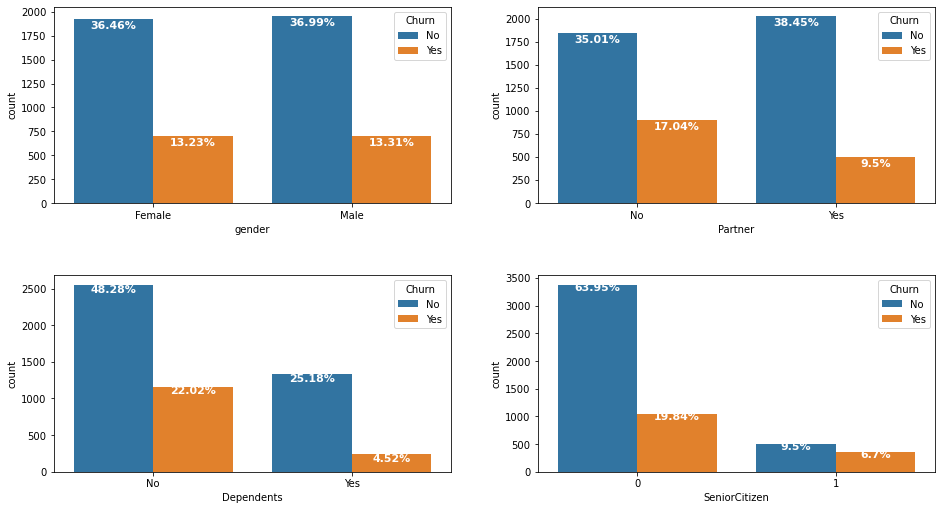

In [39]:
count_percentage_subplots(['gender', 'Partner', 'Dependents', 'SeniorCitizen'],2,2, "Churn", df, figsize_row = 14, figsize_col = 8 )

Observation:

The ratio of male and female customer were is similar.

Customers without Partner or dependent churn more than others. 


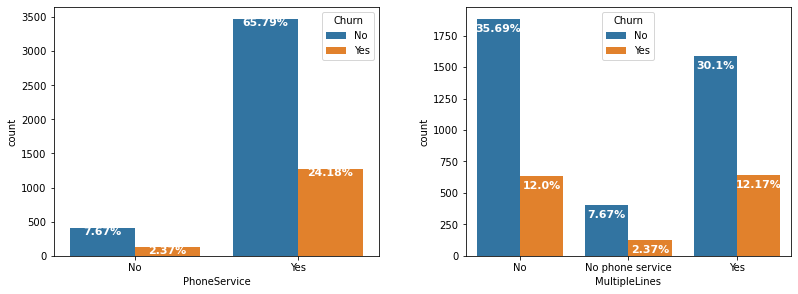

In [40]:
count_percentage_subplots(['PhoneService','MultipleLines'],1,2, "Churn", df, figsize_row = 12, figsize_col = 5 )


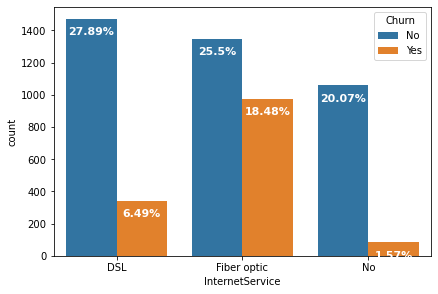

In [41]:
count_percentage_subplots(['InternetService'],1,1, "Churn", df, figsize_row = 7, figsize_col = 5 )

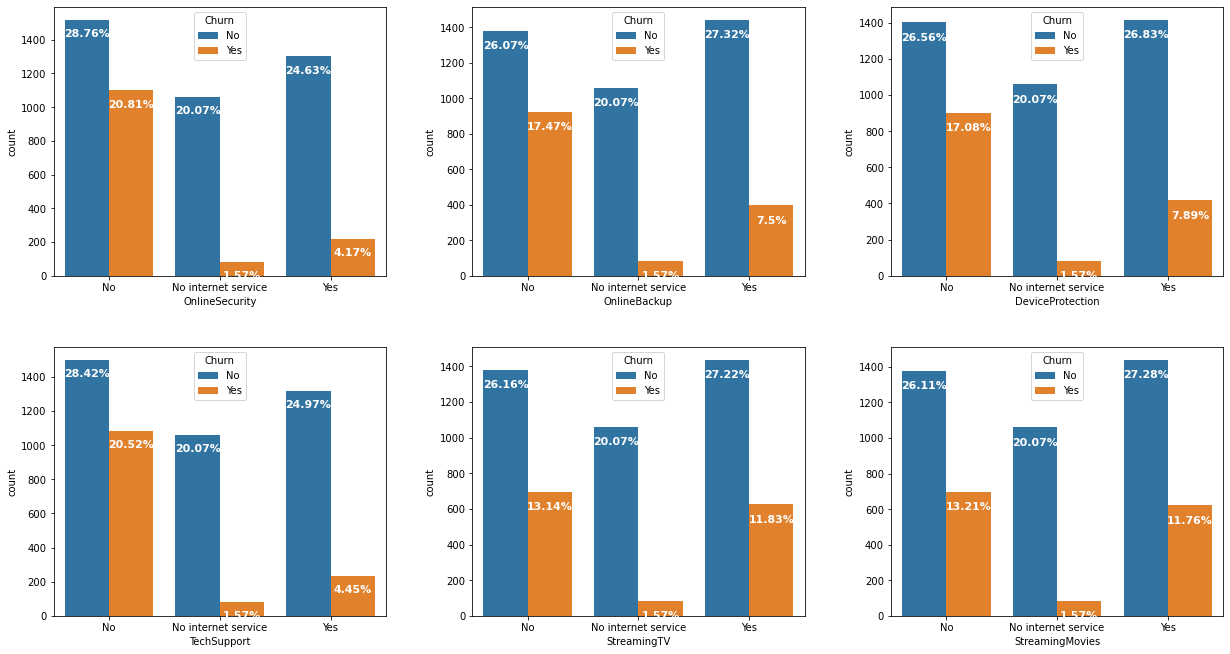

In [42]:
count_percentage_subplots(['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'],
                         2,3, "Churn", df, figsize_row = 18, figsize_col = 10 )

Observation:

A Customer who has internet service but they have "OnlineBackup"."DeviceProtection","Online Security","TechSupport" these are more likely to churn.

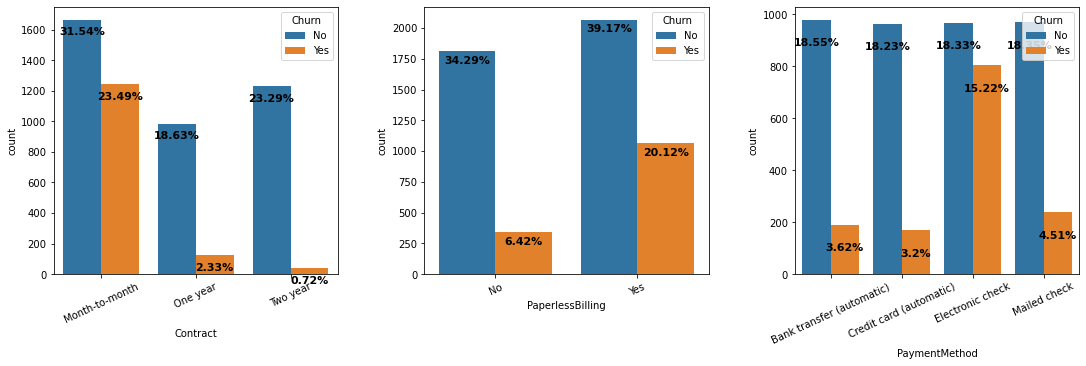

In [46]:
 count_percentage_subplots(['Contract','PaperlessBilling','PaymentMethod'],1,3, "Churn", df, figsize_row =16 , figsize_col = 6 ,x_ticks_rotation = 25,prcnt_color = 'black')


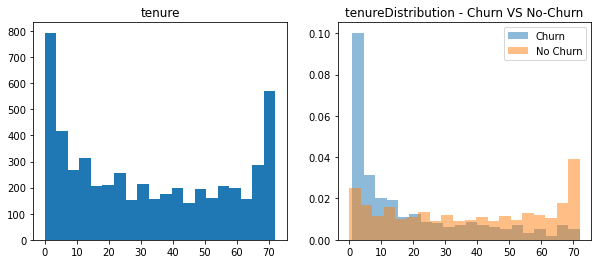

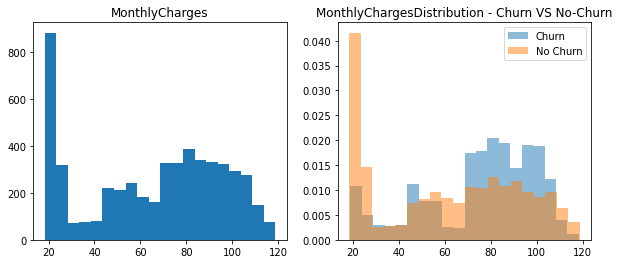

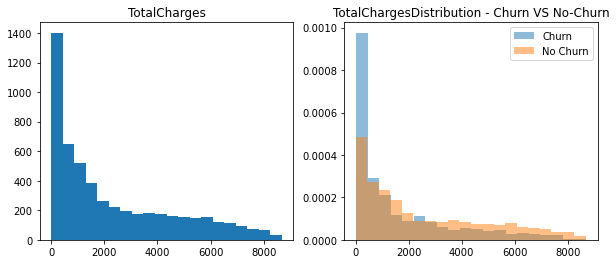

In [48]:
for feature in numerical_features[0:3]:

  fig = plt.figure(figsize = (10,4))
  
  ax1 = plt.subplot(1,2,1)
  ax1.set_title(feature)
  plt.hist(df[feature], bins =20)
  
  ax2 = plt.subplot(1,2,2)
  plt.hist(df[df['Churn'] == 'Yes'][feature], bins = 20,alpha = 0.5, label = 'Churn', density = True)
  plt.hist(df[df['Churn'] == 'No'][feature], bins = 20,alpha = 0.5, label = 'No Churn', density = True)
  # ax2.hist(df[feature], hue = df['Churn'],bins =20)
  ax2.set_title(feature+"Distribution - Churn VS No-Churn")
  ax2.legend(loc = 'upper right')
  plt.show()
  print("\n")

Observation:

I can see that the Churn customers have a shorter tenure, which means that the newly joined customers are not satisfied with our services or they were facing issues.

The Churn Customer have a high monthly charges than others.


Removing outliers - 


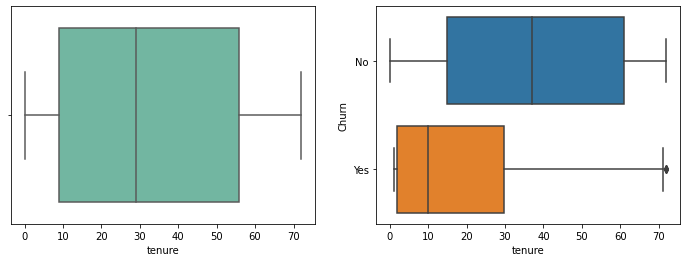

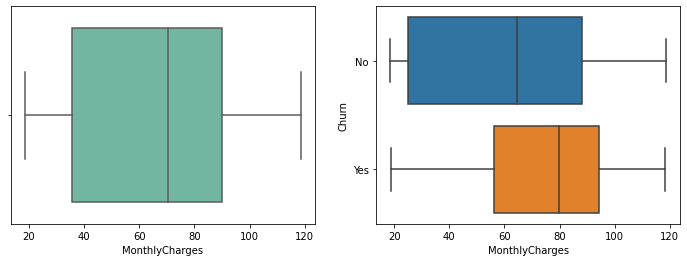

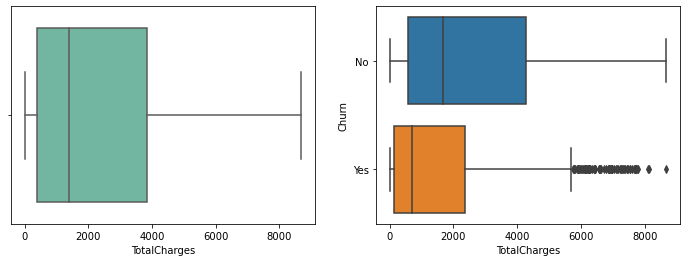

In [49]:
for feature in numerical_features:
  fig, axes = plt.subplots(1,2,figsize=(12,4))
  sns.boxplot(x = feature , data = df, ax=axes[0], palette="Set2")
  sns.boxplot(x = feature , data = df, y = 'Churn',ax=axes[1])
  plt.show()
  print("\n")


In [50]:
def plot_confusion_matrix(y_test, pred):
  cm = confusion_matrix(y_test, pred)
  
  df_cm = pd.DataFrame(cm, [0,1], [0,1])
  plt.figure(figsize=(5,3))
  sns.set(font_scale=1.4) # for label size
  sns.heatmap(df_cm, annot=True, fmt='g', cbar=False, cmap="YlGnBu") # font size , annot_kws={"size": 16}
  plt.title('Confusion Matrix\n', y=1.1)
  plt.ylabel('Actual label\n')
  plt.xlabel('Predicted label\n')

  plt.show()

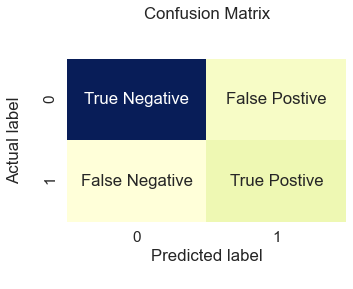

In [51]:
df_cm = pd.DataFrame([[1000,200],[150,250]],[0,1], [0,1])
annot_arr = np.array([['True Negative','False Postive'],['False Negative','True Postive']], dtype = str)
plt.figure(figsize=(5,3))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=annot_arr, fmt='s', cbar=False, cmap="YlGnBu") # font size , annot_kws={"size": 16}
plt.title('Confusion Matrix\n', y=1.1)
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')
plt.show()

Logistic regression

In [69]:
log_reg = LogisticRegression(random_state = 42, max_iter= 1000)

param_dist = {
    'C' : [0.0001,0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'penalty' : ['l1', 'l2',None]
}

In [70]:
linear_SVC = SVC(kernel = 'linear', random_state = 42)

param_dist = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
}

In [71]:
max_depth = [int(x) for x in np.linspace(10, 80, num = 11)]
max_depth.append(None)

param_grid = {'n_estimators' : [40,80,100,120,160,200,250,300],
              'max_depth' : max_depth,
              'min_samples_split' : [None,2,4,6,8],
              'min_samples_leaf' : [None,1,2,3],
              'criterion': ['gini','entropy'],
              'max_features' : ['sqrt', 'log2']}

In [72]:
param_grid = {'n_estimators' : [40,80,100,120,160,200,250,300],
              'learning_rate' : [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0]}

In [79]:
import pickle
filename = "Customer_Churn_Analysis.pkl" 
pickle.dump(lss,open("Customer_Churn_Analysis.pkl","wb"))

NameError: name 'lss' is not defined

Conclusion -

The model with highest Score is "Logistic Regression" model. So I can finalize this model. It also gives an more accuracy.